<a href="https://colab.research.google.com/github/mariokart345/DS-Unit-2-Applied-Modeling/blob/master/module1-define-ml-problems/LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [1]:
!pip install pandas_profiling

In [2]:
import pandas as pd
path='https://raw.githubusercontent.com/mariokart345/DS-Unit-2-Applied-Modeling/master/data/Video_Games_Sales_as_at_22_Dec_2016.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


I will be predicting 'Global_Sales', it looks to be a regression problem

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


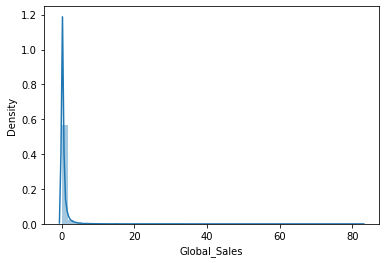

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['Global_Sales'])

The target is unfortunatly right skewed but I should be able to use log to at least get it to normal distribution 

I will be using MSE(when I log the target) and R^2 to check the model fit

I can use the column 'Year_of_Release' for a time based split and I will be trying out a random split to see if anything changes

I will be removing 'NA_Sales', 'EU_Sales', 'JP_Sales', and 'Other_Sales' to prevent leakage because 'Global_Sales' is those columns previously stated summed together

In [5]:
import numpy as np
def wrangle(df):
  #Dropping really high variance
  df.drop(labels=['Name','Developer'],axis=1,inplace=True)
  #Dropping high NaN columns
  df.drop(labels=['Rating','User_Count','User_Score','Critic_Count','Critic_Score'],axis=1,inplace=True)
  #Dropping Sales columns to prevent leakage
  df.drop(labels=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1,inplace=True)
  #Using log function to created a less skewed distribution
  df['Log_Global_Sales'] = np.log1p(df['Global_Sales'])
  #Sorting data by release date
  df['Year_of_Release'] = pd.to_datetime(df['Year_of_Release'],infer_datetime_format=False)
  df['Year_of_Release'] = df['Year_of_Release'].dt.year
  df.sort_values(by='Year_of_Release',ascending=False)
  return df

In [6]:
df = wrangle(df)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


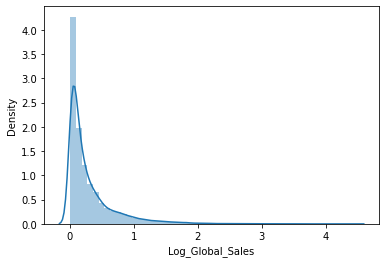

In [10]:
sns.distplot(df['Log_Global_Sales'])

In [8]:
df.head()

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Log_Global_Sales
0,Wii,1970.0,Sports,Nintendo,82.53,4.425206
1,NES,1970.0,Platform,Nintendo,40.24,3.719409
2,Wii,1970.0,Racing,Nintendo,35.52,3.597860
3,Wii,1970.0,Sports,Nintendo,32.77,3.519573
4,GB,1970.0,Role-Playing,Nintendo,31.37,3.477232
